### CUSTOMER ANALYSIS FOR RETAIL

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [5]:
# importing dataset

customer = pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\Business Analytics\python\case study\Case Study 1 - Retail Case Study\Customer.csv")
transaction = pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\Business Analytics\python\case study\Case Study 1 - Retail Case Study\Transactions.csv")
product = pd.read_csv (r"C:\Users\kavir\OneDrive\Documents\Business Analytics\python\case study\Case Study 1 - Retail Case Study\prod_cat_info.csv")


In [6]:
customer.head(3)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0


In [7]:
transaction.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [8]:
product.head(3)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids


#### Renaming columns

In [9]:
customer.rename (columns = {'customer_Id':'cust_id'}, inplace = True)
customer.head()

,cust_id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [10]:
product.rename (columns = {'prod_sub_cat_code':'prod_subcat_code'}, inplace = True)
product.head()

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


##### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final

In [42]:
Customer_Final = transaction.merge(product, on = ['prod_cat_code', 'prod_subcat_code'], how = 'left').merge(customer, on = 'cust_id', how = 'left')
Customer_Final.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0


##### 2. a. Get the column names and their corresponding data types

In [43]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
 10  prod_cat          23053 non-null  object 
 11  prod_subcat       23053 non-null  object 
 12  DOB               23053 non-null  object 
 13  Gender            23044 non-null  object 
 14  city_code         23045 non-null  float64
dtypes: float64(3), int64(6), object(6)
memory usage: 2.8+ MB


##### 2.b. Top/Bottom 10 observations

In [44]:
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,09-10-1982,F,6.0
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,29-05-1981,M,9.0
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,21-04-1971,M,9.0
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,04-11-1971,F,8.0
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,27-11-1979,F,3.0


##### 2.c. "Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [14]:
Customer_Final.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,city_code
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23045.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,5.482534
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,2.863499
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,3.000000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,5.000000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,10.000000


##### 2.d.  Frequency tables for all the categorical variables

In [37]:
Customer_Final.value_counts('Store_type')

Store_type
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
dtype: int64

In [38]:
Customer_Final.value_counts('prod_cat')

prod_cat
Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
dtype: int64

In [39]:
Customer_Final.value_counts('prod_subcat')

prod_subcat
Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Comics                 1031
Mobiles                1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
dtype: int64

In [41]:
Customer_Final.value_counts('Gender')

Gender
M    11811
F    11233
dtype: int64

##### 3. Generate histograms for all continuous variables and frequency bars for categorical variables

In [175]:
continuous_var = Customer_Final.select_dtypes(include = ['int64','float64'])

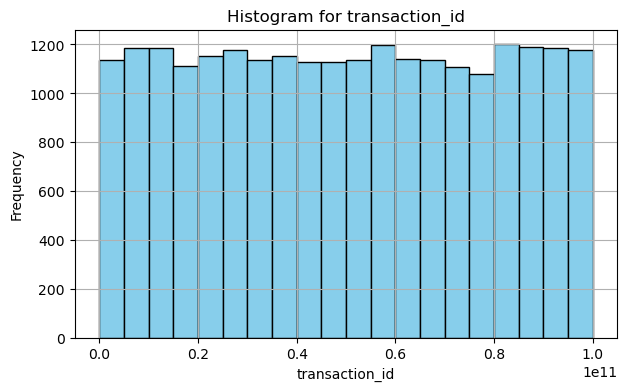

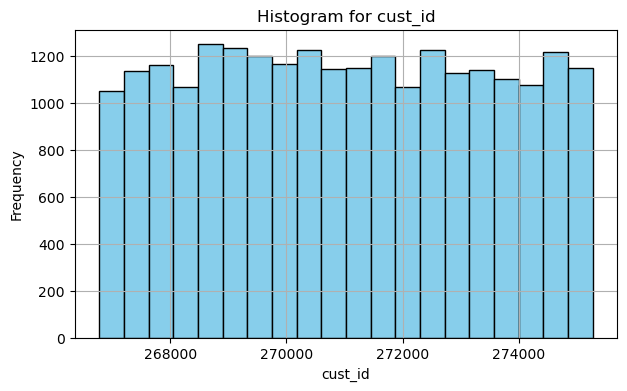

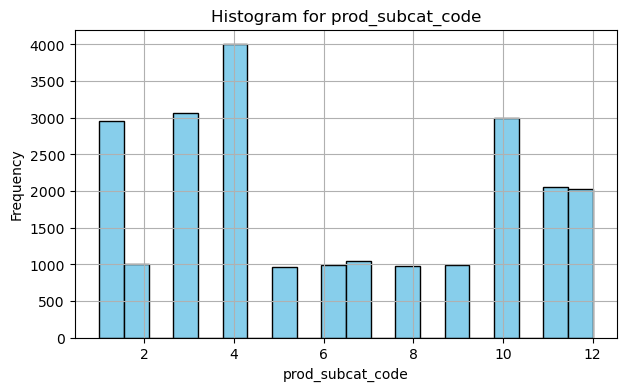

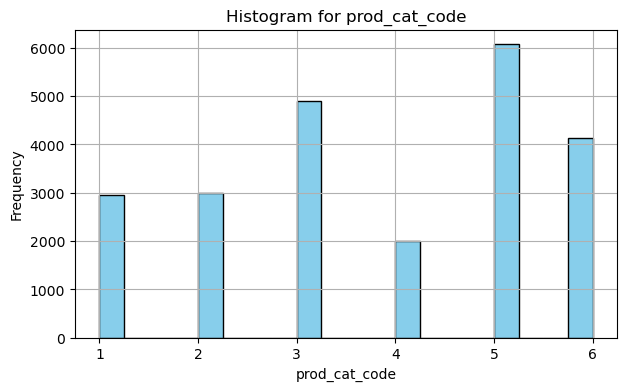

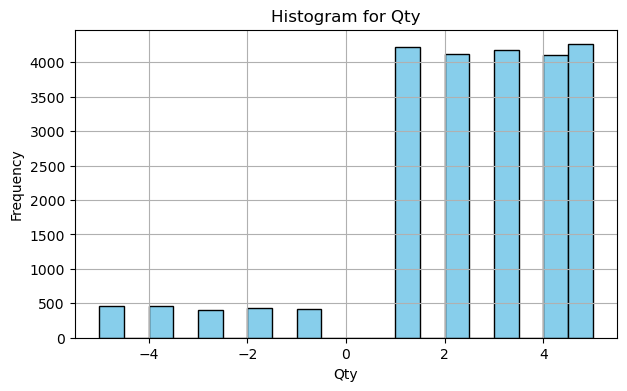

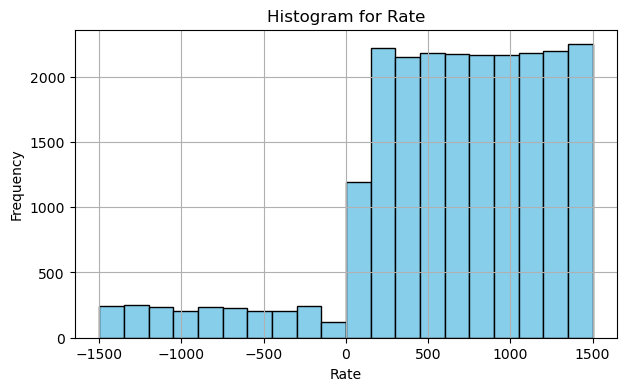

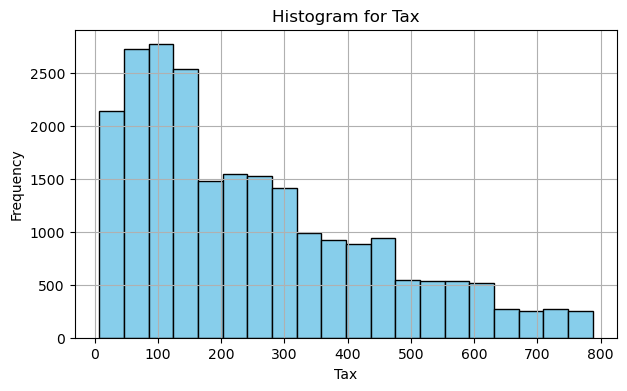

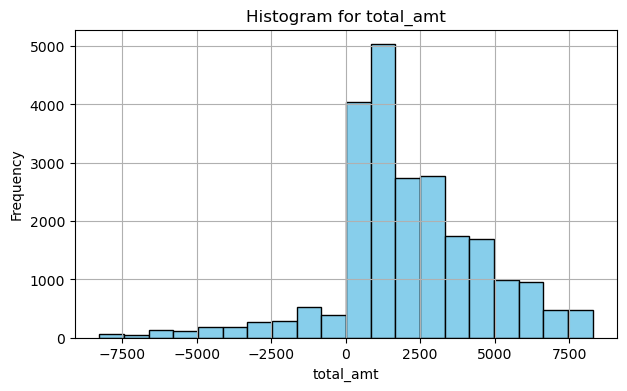

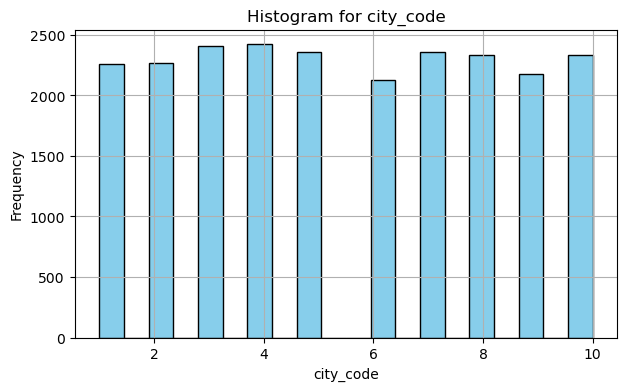

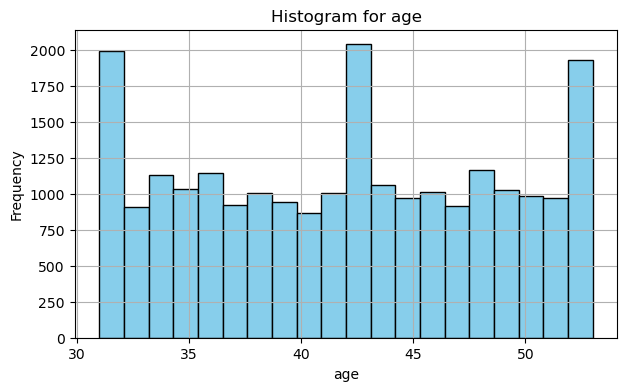

In [178]:
for column in continuous_var.columns:
    plt.figure(figsize=(7, 4))
    plt.hist(continuous_var[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [180]:
categorical_var = Customer_Final.select_dtypes(include = ['object'])

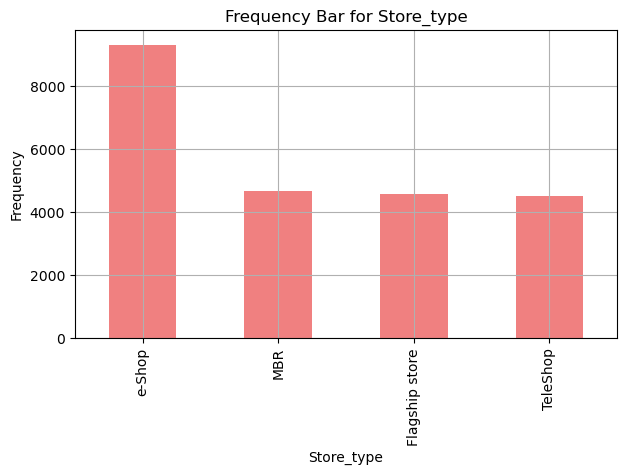

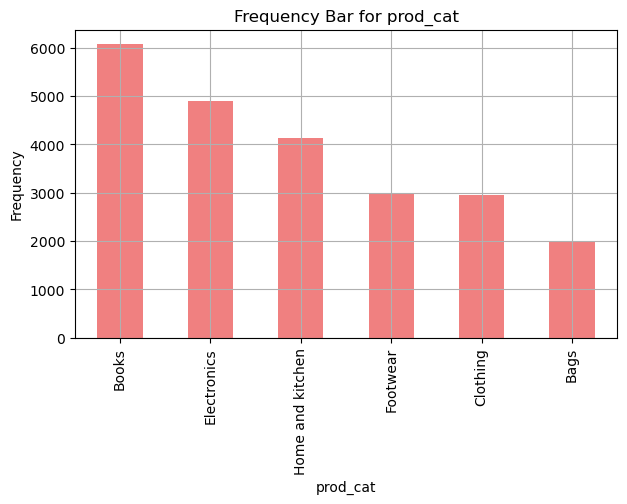

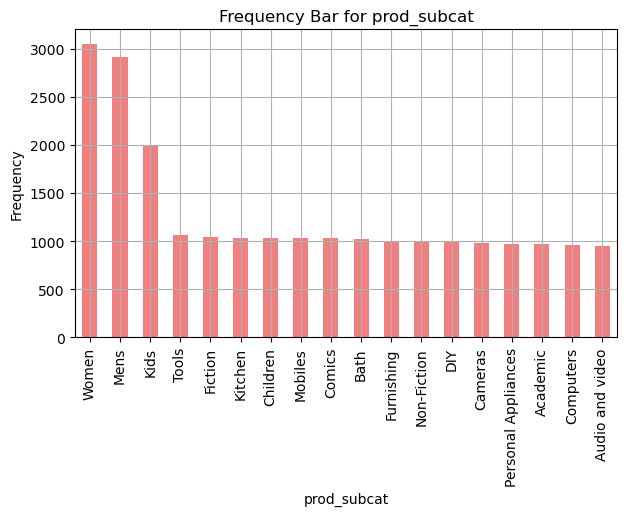

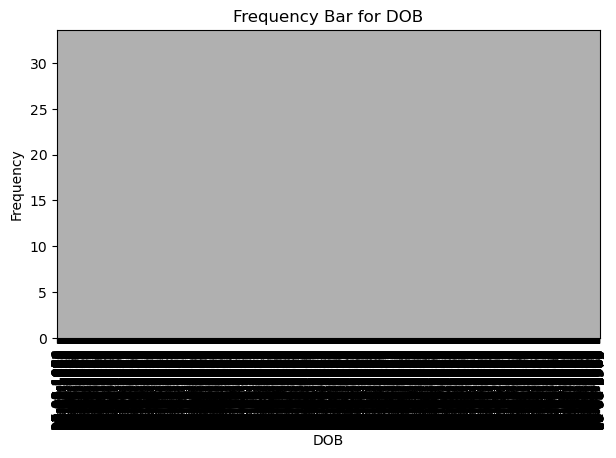

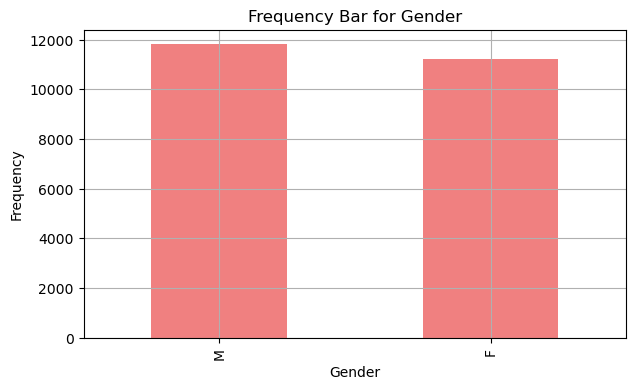

In [182]:
for column in categorical_var:
    plt.figure(figsize=(7, 4))
    Customer_Final[column].value_counts().plot(kind='bar', color='lightcoral')
    plt.title(f'Frequency Bar for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

##### 4.a. Time period of the available transaction data

In [45]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'],infer_datetime_format=True)

# date formats in the col are not consistent, infer_datetime automatically detecs the format and converts it.

C:\Users\kavir\AppData\Local\Temp\ipykernel_27488\3474985513.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'],infer_datetime_format=True)


In [67]:
Customer_Final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
DOB                         object
Gender                      object
city_code                  float64
dtype: object

In [49]:
start_date = Customer_Final['tran_date'].min()
end_date = Customer_Final['tran_date'].max()

In [48]:
duration = start_date - end_date
print(duration)

-1430 days +00:00:00


##### 4.b. Count of transactions where the total amount of transaction was negative

In [59]:
return_tran = Customer_Final[Customer_Final['total_amt'] < 0]
return_tran['transaction_id'].count()

2177

##### 5. Analyze which product categories are more popular among females vs male customers

In [63]:
popular_prod = Customer_Final.groupby(['Gender','prod_cat']).size().reset_index(name = 'counts')
popular_prod.head()

#grouping by gender and product category, resetting the index and giving name to the count col as 'counts'

,Gender,prod_cat,counts
0,F,Bags,994
1,F,Books,2949
2,F,Clothing,1439
3,F,Electronics,2328
4,F,Footwear,1529


In [66]:
popular_prod.sort_values(by = 'counts', ascending = False).set_index('Gender').head()

,prod_cat,counts
Gender,,
M,Books,3116
F,Books,2949
M,Electronics,2570
F,Electronics,2328
M,Home and kitchen,2134


##### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [92]:
Customer_Final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,26-09-1981,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,11-05-1973,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,08-06-1981,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0


In [70]:
Total_cust = Customer_Final['cust_id'].nunique()
Total_cust
                            # total for percentage

5506

In [75]:
cust_by_city = Customer_Final.groupby('city_code')['cust_id'].count().sort_values(ascending = False).reset_index(name = 'counts')
cust_by_city

#cust count by city code

,city_code,counts
0,4.0,2422
1,3.0,2411
2,5.0,2360
3,7.0,2356
4,10.0,2333
5,8.0,2330
6,2.0,2270
7,1.0,2258
8,9.0,2178
9,6.0,2127


In [76]:
cust_by_city['percentage'] = cust_by_city['counts']/Total_cust * 100
cust_by_city

,city_code,counts,percentage
0,4.0,2422,43.988376
1,3.0,2411,43.788594
2,5.0,2360,42.862332
3,7.0,2356,42.789684
4,10.0,2333,42.371958
5,8.0,2330,42.317472
6,2.0,2270,41.227752
7,1.0,2258,41.009807
8,9.0,2178,39.556847
9,6.0,2127,38.630585


##### 7. Which store type sells the maximum products by value and by quantity?

In [85]:
sale_by_stores = Customer_Final.groupby('Store_type')[['Rate','Qty']].sum()
sale_by_stores

,Rate,Qty
Store_type,,
Flagship store,2941557,11133
MBR,2953253,11194
TeleShop,2834420,10984
e-Shop,5941001,22763


In [86]:
sale_by_stores.sort_values(by = 'Qty', ascending = False)

,Rate,Qty
Store_type,,
e-Shop,5941001,22763
MBR,2953253,11194
Flagship store,2941557,11133
TeleShop,2834420,10984


##### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [103]:
Total_amt_cat = Customer_Final.loc[(Customer_Final['Store_type'] == 'Flagship store') & (Customer_Final['prod_cat'].isin(['Clothing','Electronics'])), ['Store_type','prod_cat','total_amt']]

Total_amt_cat.head()

,Store_type,prod_cat,total_amt
59,Flagship store,Electronics,185.64
90,Flagship store,Electronics,1980.16
103,Flagship store,Clothing,1670.76
104,Flagship store,Electronics,5931.64
112,Flagship store,Electronics,738.14


In [104]:
Total_amt_cat.groupby(['Store_type','prod_cat'])['total_amt'].sum()

Store_type      prod_cat   
Flagship store  Clothing       1194423.23
                Electronics    2215136.04
Name: total_amt, dtype: float64

##### 9.  What was the total amount earned from "Male" customers under the "Electronics" category?

In [116]:
Customer_Final.loc [(Customer_Final['Gender'] == 'M') & (Customer_Final['prod_cat'] == 'Electronics'),'total_amt'].sum()

5703109.424999999

##### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [123]:
pos_trans = Customer_Final.loc[Customer_Final['total_amt'] > 0, ['cust_id', 'transaction_id']]
pos_trans.head()

,cust_id,transaction_id
10,270384,29258453508
11,267750,25455265351
12,275023,1571002198
14,269345,36554696014
15,268799,56814940239


In [129]:
cust_trans = pos_trans.groupby('cust_id')['transaction_id'].nunique()
cust_trans.head()

cust_id
266783     4
266784     3
266785     7
266788     4
266794    11
Name: transaction_id, dtype: int64

In [134]:
count_cust = cust_trans[cust_trans > 10].count()
print ('customers with more than 10 unique transactions = ', count_cust)

customers with more than 10 unique transactions =  6


In [135]:
Customer_Final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,26-09-1981,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,11-05-1973,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,08-06-1981,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0


##### 11.a. For all customers aged between 25 - 35, What was the total amount spent for “Electronics” and “Books” product categories?

In [147]:
Current_year = dt.datetime.now().year
Current_year

2023

In [148]:
Customer_Final ['age'] = Current_year - pd.to_datetime (Customer_Final['DOB'], infer_datetime_format= True ).dt.year

# creating new col for age

In [151]:
Customer_Final.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code,age
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,26-09-1981,M,5.0,42
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,11-05-1973,F,8.0,50
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,27-07-1992,M,8.0,31


In [167]:
filtered_data = Customer_Final.loc[(Customer_Final['age'] >= 25) & (Customer_Final['age'] <= 35) & (Customer_Final['prod_cat'].isin (['Electronics','Books'])), ['age','prod_cat','total_amt']]

filtered_data.head()

,age,prod_cat,total_amt
2,31,Books,-1748.11
4,31,Books,-1748.11
59,32,Electronics,185.64
68,35,Electronics,804.44
69,33,Books,4199.00


In [171]:
filtered_data['total_amt'].sum()

4939932.335

##### 11.b. For all customers aged between 25 - 35, What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [174]:
Total_amt_spent =  Customer_Final.loc[(Customer_Final['age'] >= 25) & (Customer_Final['tran_date'] >= '2014-01-01') & (Customer_Final['tran_date'] <= '2014-03-01'), 'total_amt'].sum()
Total_amt_spent

1409397.665